In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

###  Problem Statment:Predict delivery time using sorting time

In [2]:
df= pd.read_csv("E:\Data Science\Assignments\Simple Linear Regression\delivery_time.csv")

In [3]:
df.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

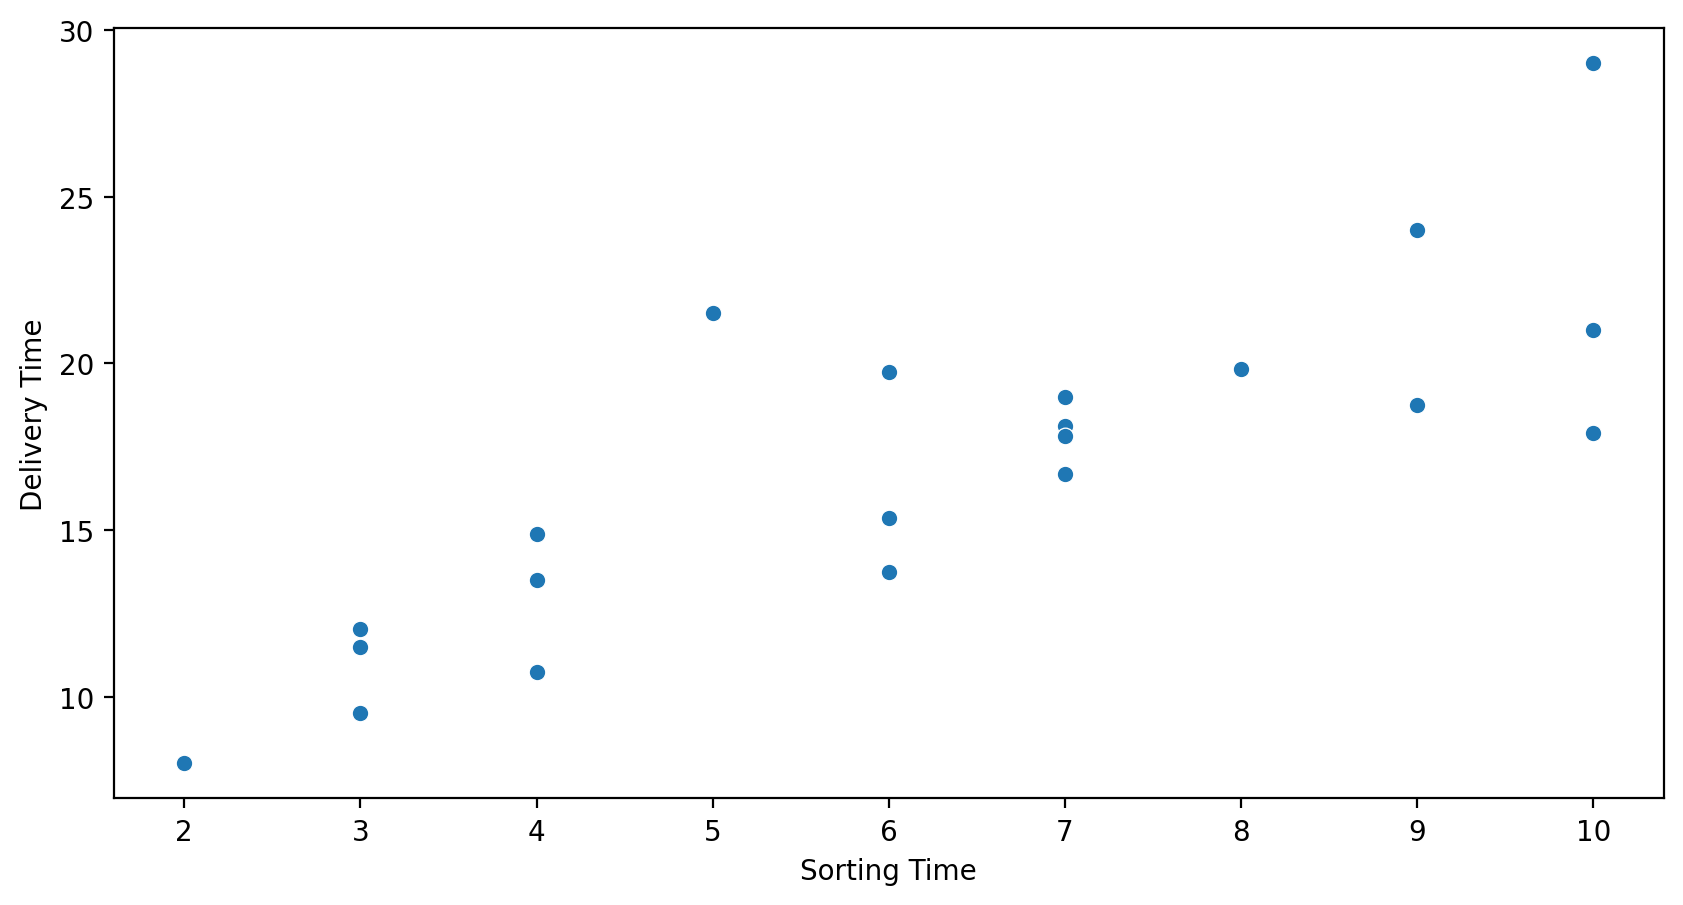

In [5]:
sns.scatterplot(x = df['Sorting Time'] , y = df['Delivery Time'])

<Axes: >

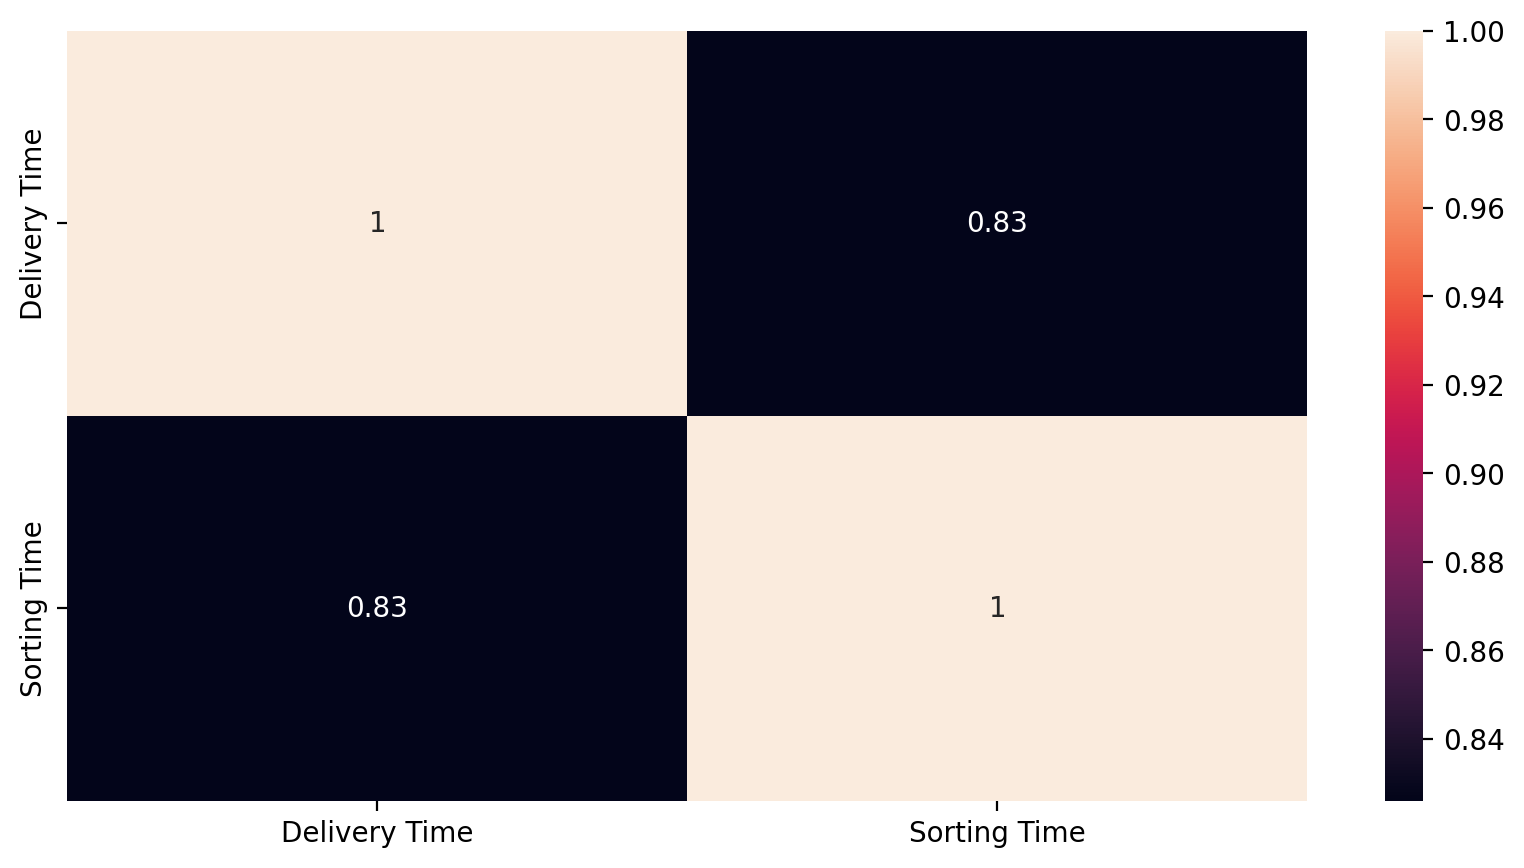

In [6]:
sns.heatmap(df.corr(),annot = True)

In [7]:
df = df.rename({'Delivery Time': 'DT','Sorting Time': 'ST'}, axis=1)
model = smf.ols('DT ~ ST',data = df).fit()

In [8]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [9]:
model.predict(df['ST'])

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [10]:
# Line Equation
Delivery_Time = 1.64*10+6.58

In [11]:
Delivery_Time

22.979999999999997

In [12]:
#Print p value
model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [13]:
#r2 value
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

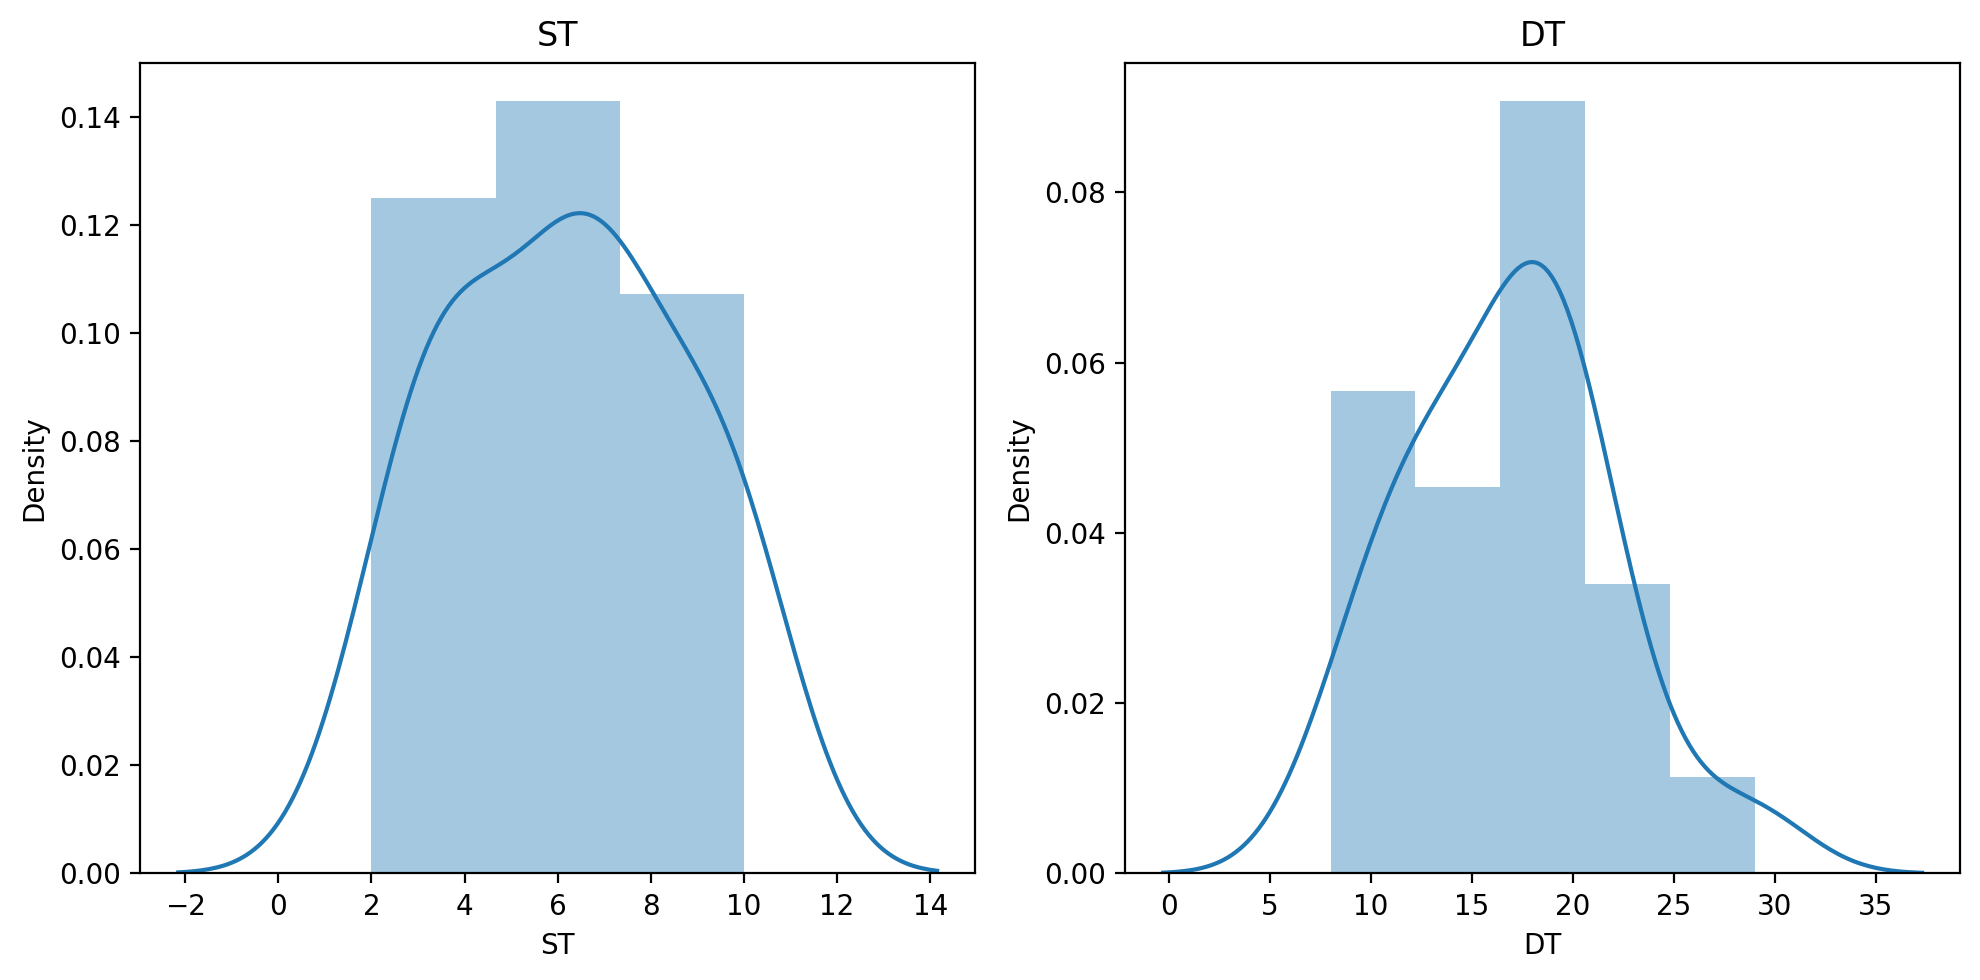

In [14]:
# Data Transformation 
plt.subplot(1,2,1)
sns.distplot(df['ST'])
plt.title('ST')

plt.subplot(1,2,2)
sns.distplot(df['DT'])
plt.title('DT')

plt.tight_layout()

In [15]:
df['ST'].skew()

0.047115474210530174

In [16]:
df['DT'].skew()

0.3523900822831107

In [17]:
# log Transformation 
df['log_ST'] = np.log(df['ST'])
df['log_DT'] = np.log(df['DT'])
df

,DT,ST,log_ST,log_DT
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


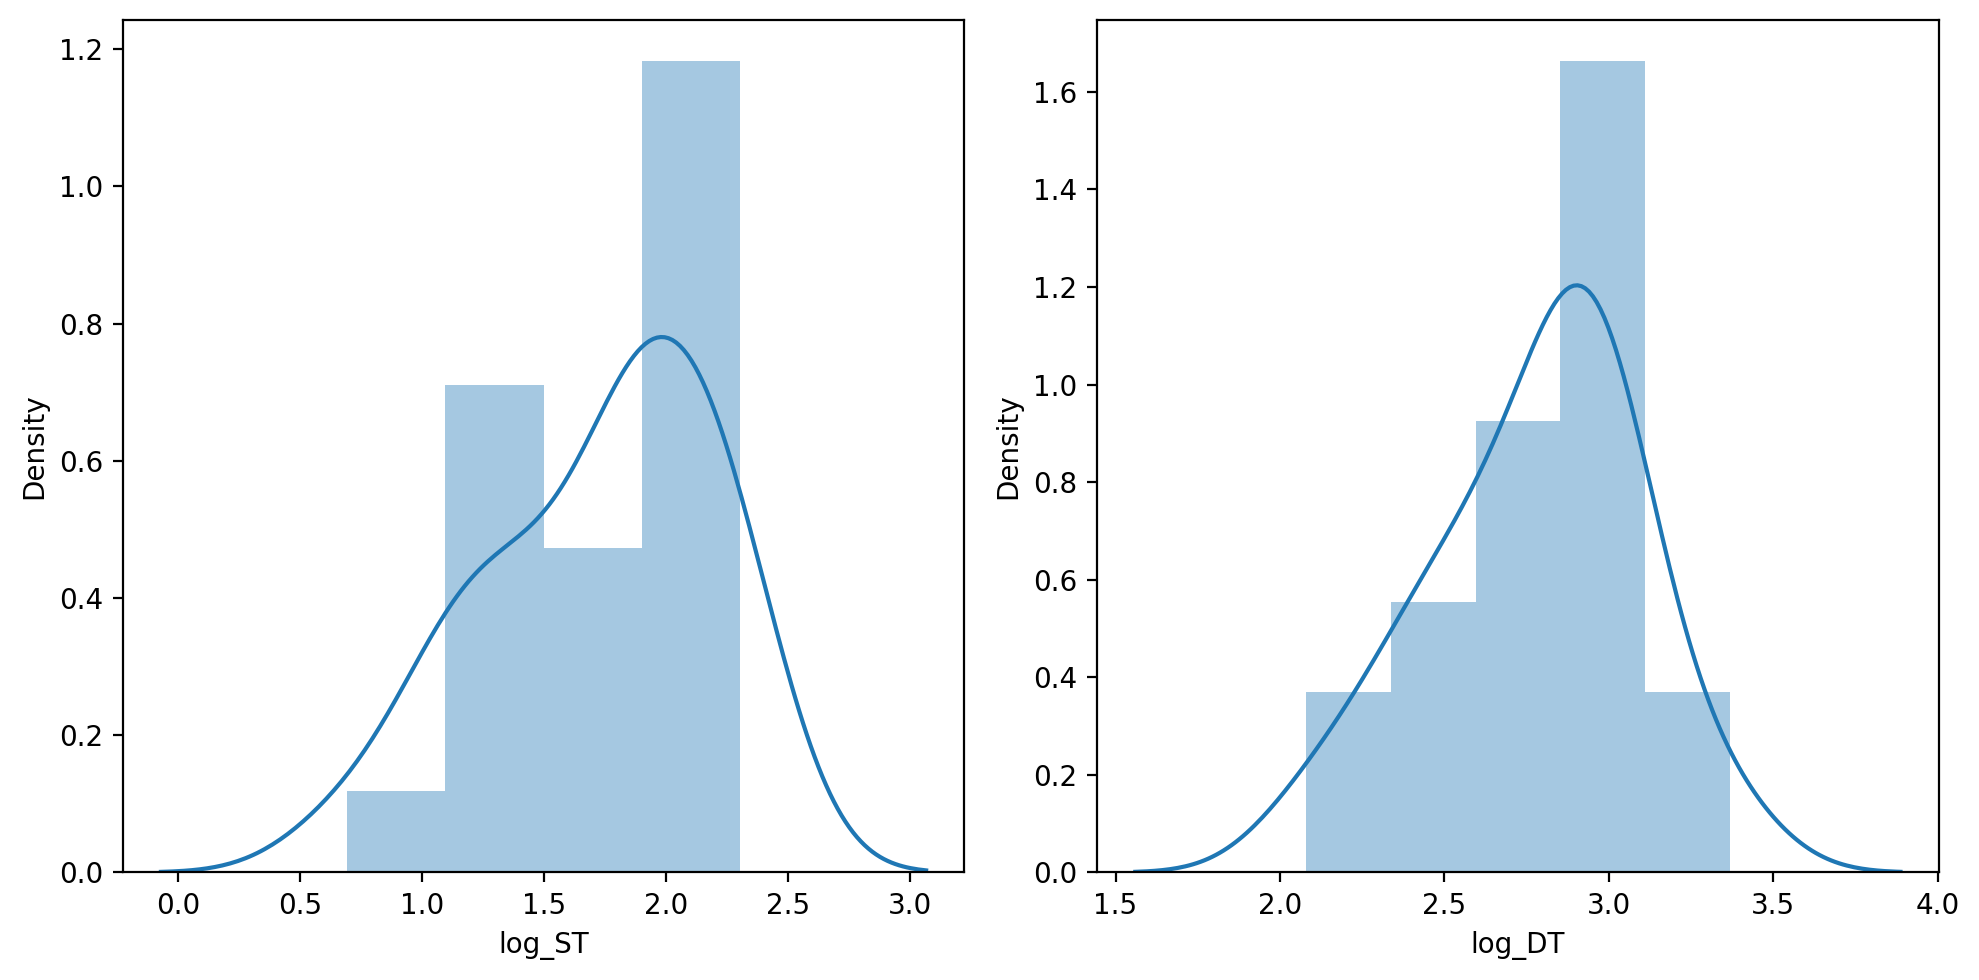

In [18]:
plt.subplot(1,2,1)
sns.distplot(df['log_ST'])

plt.subplot(1,2,2)
sns.distplot(df['log_DT'])

plt.tight_layout()

In [19]:
df['log_ST'].skew()

-0.6052357185134765

In [20]:
df['log_DT'].skew()

-0.4512901148522999

In [21]:
#Sqrt Transformation
x_sqrt = np.sqrt(df['ST'])
x_sqrt

0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: ST, dtype: float64

In [22]:
y_sqrt = np.sqrt(df['DT'])

In [23]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [24]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     DT   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):                    2.10e-20
Time:                        01:46:52   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ST             1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Output Interpretation
We will use Model 7 as it has the best R square value

1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == 1.64
Thus if the value of Sorting Time is increased by 1, the predicted value of Delivery Time will increase by 1.64

3 - Adj. R-sqared == 0.987
Thus the model explains 98.7% of the variance in dependent variable